In [2]:
import ROOT as R

Welcome to JupyROOT 6.24/00


In [3]:
import MyLibrary
reload(MyLibrary)
from MyLibrary import Sort_keys
from MyLibrary import GetHist
from MyLibrary import DrawTotalDep
from MyLibrary import DrawEdep

from MyLibrary import processes
from MyLibrary import particles

import MyLibrary as MyLib

MyLib.tfile = R.TFile('/Users/cheng/workspace/Data/musrsim-sms/output_musr_1000_Laser_irradiation.root','read')
MyLib.lumi_scale = 6.25e+7/1.e+8
MyLib.scaleToLumi = True

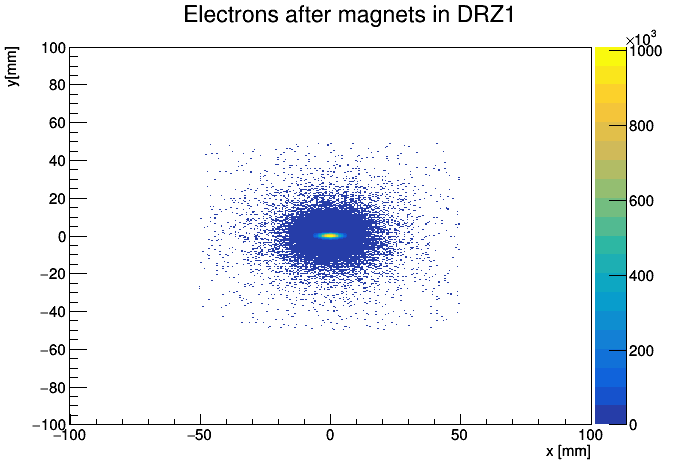

In [56]:
# injected electrons position
c = R.TCanvas()
c.SetRightMargin(0.15)
xy_in = GetHist('DRZ1_e_m_xy')
xy_in.SetStats(0)
xy_in.GetXaxis().SetRangeUser(-100,100)
xy_in.GetYaxis().SetRangeUser(-100,100)
xy_in.SetTitle('Electrons after magnets in DRZ1;x [mm];y[mm]')

xy_in.Draw('COLZ')
c.Draw()

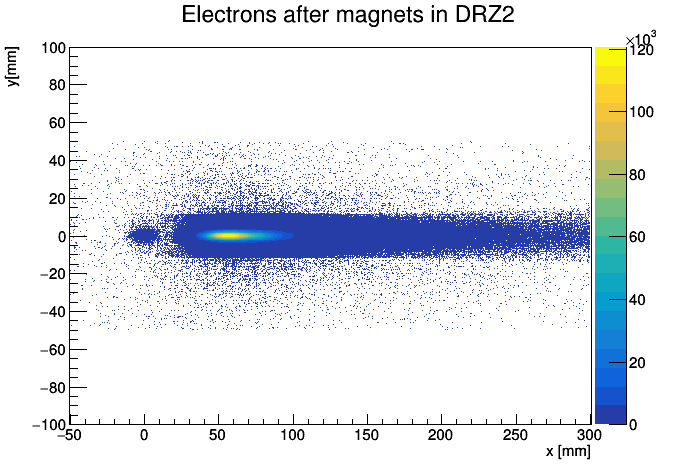

In [28]:
# injected electrons position
c = R.TCanvas()
c.SetRightMargin(0.15)
xy_in = GetHist('DRZ2_e_m_xy')
xy_in.SetStats(0)
xy_in.GetXaxis().SetRangeUser(-50,500)
xy_in.GetYaxis().SetRangeUser(-100,100)
xy_in.SetTitle('Electrons after magnets in DRZ2;x [mm];y[mm]')

xy_in.Draw('COLZ')
c.Draw()

In [29]:
f = lambda x : [a[0] for a in x]
print f(Sort_keys(particles,'Detector_{0:}_time'))
print f(Sort_keys(particles,'Detector_{0:}_time_small'))
print f(Sort_keys(particles,'Detector_{0:}_time_tiny'))

['e_m', 'neutron', 'e_p', 'proton', 'C12', 'gamma', 'deuteron', 'C13', 'alpha', 'Be8', 'pi-', 'B11', 'pi+', 'C11', 'triton', 'B10', 'B10', 'Be10', 'Be7', 'mu_m', 'mu_p']
['e_m', 'neutron', 'e_p', 'proton', 'C12', 'gamma', 'deuteron', 'C13', 'alpha', 'Be8', 'pi-', 'B11', 'pi+', 'C11', 'B10', 'B10', 'Be10', 'triton', 'Be7', 'mu_m', 'mu_p']
['e_m', 'e_p', 'proton', 'neutron', 'C12', 'gamma', 'C13', 'alpha', 'Be8', 'deuteron', 'pi-', 'B11', 'pi+', 'C11', 'Be10', 'B10', 'B10', 'triton', 'Be7', 'mu_m', 'mu_p']


['e_m', 'e_p', 'proton', 'C12', 'neutron', 'gamma', 'deuteron', 'C13', 'pi-', 'alpha', 'Be8', 'pi+', 'B11', 'B10', 'B10', 'triton', 'Be10', 'C11', 'mu_m', 'mu_p', 'Be7']


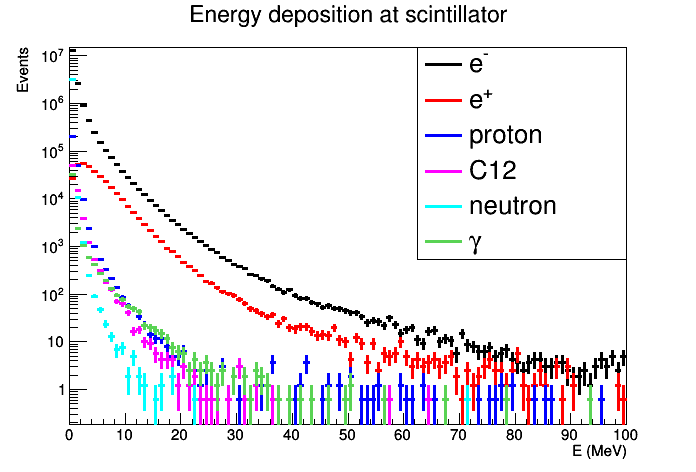

In [30]:
# energy deposition in detector
#draw energy deposition
f = lambda x : [a[0] for a in x]
keys = f(Sort_keys(particles,'Detector_{0:}_edep',lambda x:x.GetMean()*x.Integral()))
print keys
tmp_h = 'Detector_{0:}_edep'
xRange = [0,100]
title = 'Energy deposition at scintillator;E (MeV);Events'
c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:6])
c.SetLogy()
c.Draw()

['eBrem', 'annihil', 'conv', 'eIoni', 'initialParticle', 'compt', 'photonNuclear', 'phot', 'neutronInelastic', 'electronNuclear', 'hBertiniCaptureAtRest', 'Decay', 'nCapture', 'pi-Inelastic', 'hIoni', 'pi+Inelastic', 'protonInelastic', 'muMinusCaptureAtRest', 'hadElastic', 'dInelastic']


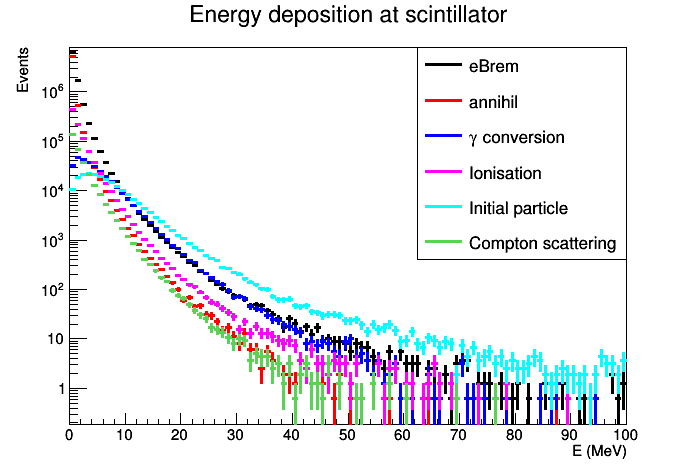

In [35]:
f = lambda x : [a[0] for a in x]
keys = f(Sort_keys(processes,'Detector_From_{0:}_edep',lambda x:x.GetMean()*x.Integral()))
print keys

tmp_h = 'Detector_From_{0:}_e_m_edep'
xRange = [0,100]
title = 'Energy deposition at scintillator;E (MeV);Events'
c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:6])
c.SetLogy(1)
c.Draw()

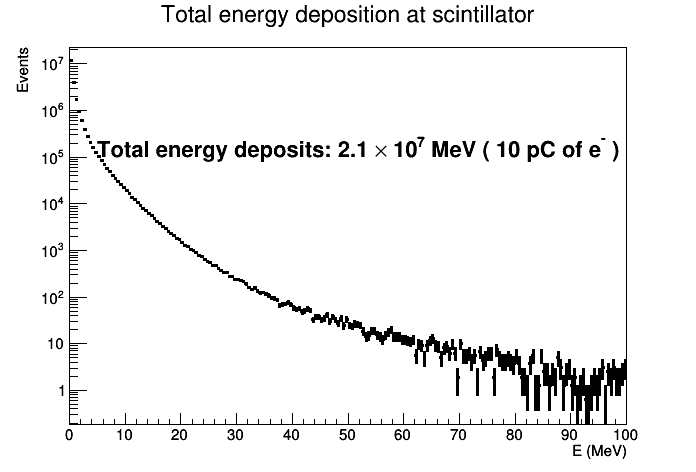

In [36]:
xRange = [0,100]
title = 'Total energy deposition at scintillator;E (MeV);Events'
c,_ = DrawTotalDep(xRange,title,rebin=0.,tex_pos=[5,1e5])
c.Draw()

['e_m', 'neutron', 'e_p', 'proton', 'C12', 'gamma', 'deuteron', 'C13', 'alpha', 'Be8', 'pi-', 'B11', 'pi+', 'C11', 'triton', 'B10', 'B10', 'Be10', 'Be7', 'mu_m', 'mu_p']
['e_m', 'neutron', 'e_p', 'proton', 'C12', 'gamma', 'deuteron', 'C13', 'alpha', 'Be8', 'pi-', 'B11', 'pi+', 'C11', 'B10', 'B10', 'Be10', 'triton', 'Be7', 'mu_m', 'mu_p']
['e_m', 'e_p', 'proton', 'neutron', 'C12', 'gamma', 'C13', 'alpha', 'Be8', 'deuteron', 'pi-', 'B11', 'pi+', 'C11', 'Be10', 'B10', 'B10', 'triton', 'Be7', 'mu_m', 'mu_p']


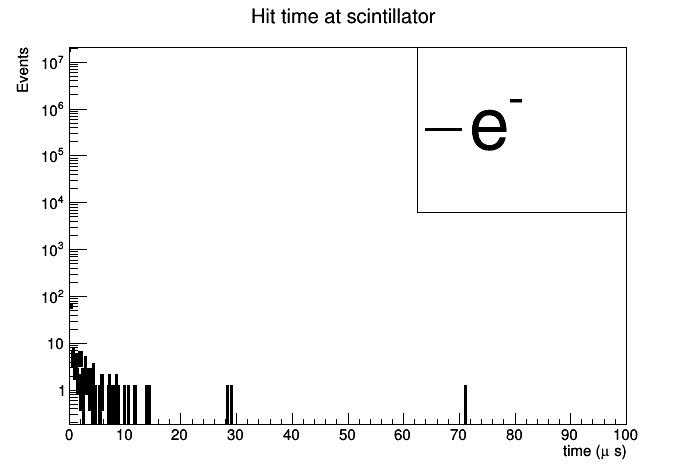

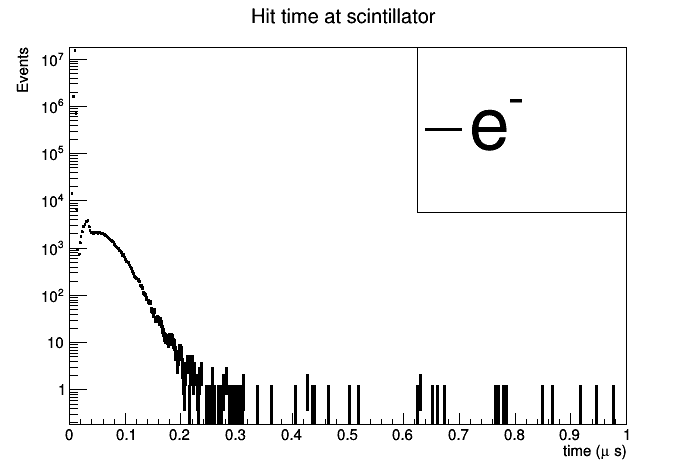

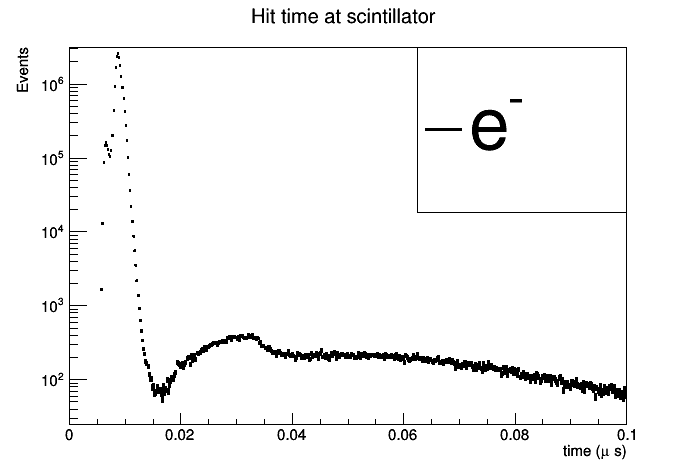

In [44]:
# energy deposition in detector
#draw energy deposition

canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    tmp_h = 'Detector_{{0:}}_{0:}'.format(time_array[n])
    xRange = xRanges[n]
    title = 'Hit time at scintillator;time (#mu s);Events'
    f = lambda x : [a[0] for a in x]
    keys = f(Sort_keys(particles,'Detector_{{0:}}_{0:}'.format(time_array[n]),R.TH1F.Integral))
    print keys
    c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:1],legPos=[0.6,0.55,0.9,0.9])
    c.SetLogy(1)
    c.Draw()
    canvas.append(c)
    __.append(_)

['eBrem', 'annihil', 'photonNuclear', 'eIoni', 'conv', 'neutronInelastic', 'compt', 'initialParticle', 'phot', 'electronNuclear', 'hBertiniCaptureAtRest', 'protonInelastic', 'pi-Inelastic', 'nCapture', 'pi+Inelastic', 'Decay', 'muMinusCaptureAtRest', 'dInelastic', 'hIoni', 'hadElastic']
['eBrem', 'annihil', 'photonNuclear', 'eIoni', 'conv', 'compt', 'initialParticle', 'neutronInelastic', 'phot', 'electronNuclear', 'hBertiniCaptureAtRest', 'protonInelastic', 'nCapture', 'pi-Inelastic', 'pi+Inelastic', 'Decay', 'hIoni', 'muMinusCaptureAtRest', 'dInelastic', 'hadElastic']
['eBrem', 'annihil', 'eIoni', 'conv', 'compt', 'photonNuclear', 'initialParticle', 'phot', 'neutronInelastic', 'electronNuclear', 'hBertiniCaptureAtRest', 'nCapture', 'protonInelastic', 'pi-Inelastic', 'Decay', 'pi+Inelastic', 'hIoni', 'hadElastic', 'dInelastic', 'muMinusCaptureAtRest']


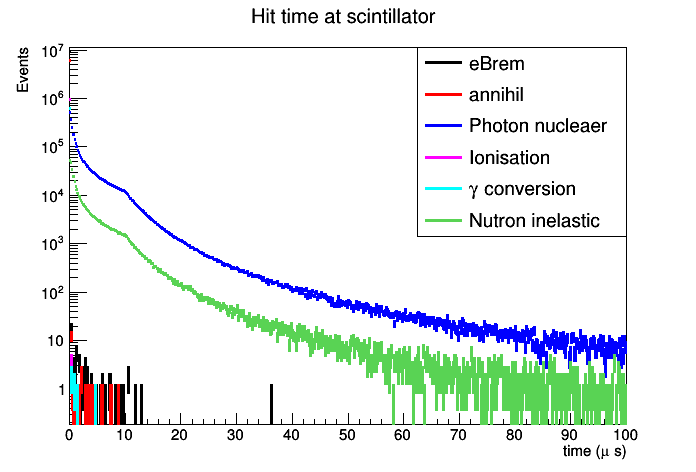

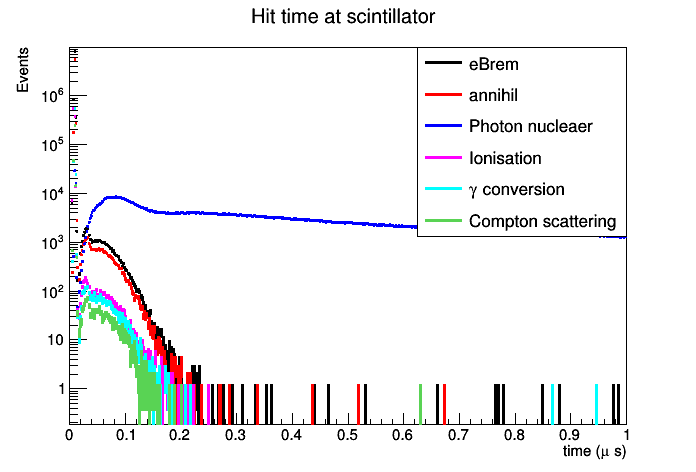

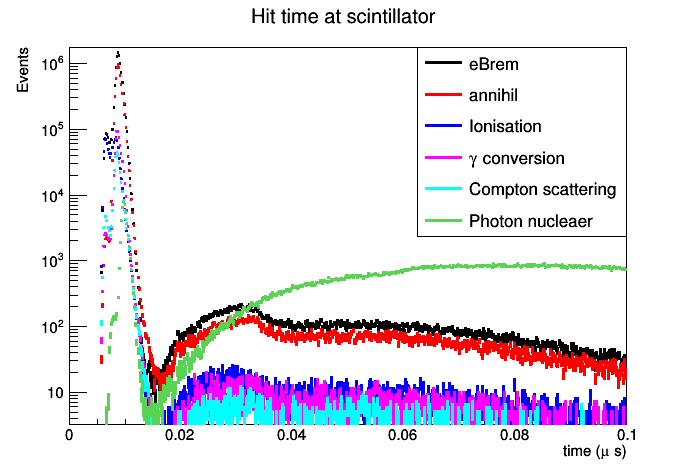

In [42]:
# energy deposition in detector
#draw energy deposition

canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    tmp_h = 'Detector_From_{{0:}}_{0:}'.format(time_array[n])
    xRange = xRanges[n]
    title = 'Hit time at scintillator;time (#mu s);Events'
    f = lambda x : [a[0] for a in x]
    keys = f(Sort_keys(processes,tmp_h,R.TH1F.Integral))
    print keys    
    c,_ = DrawEdep(tmp_h,xRange,title,rebin=2,particles=keys[:6],legPos=[0.6,0.5,0.9,0.9])
    c.SetLogy()
    c.Draw()
    canvas.append(c)
    __.append(_)

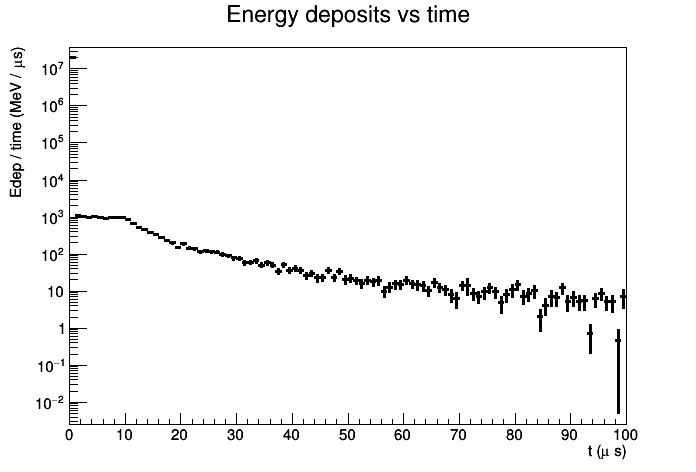

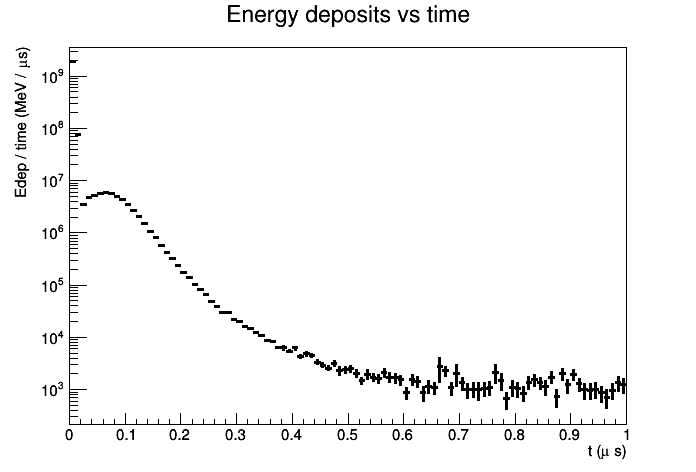

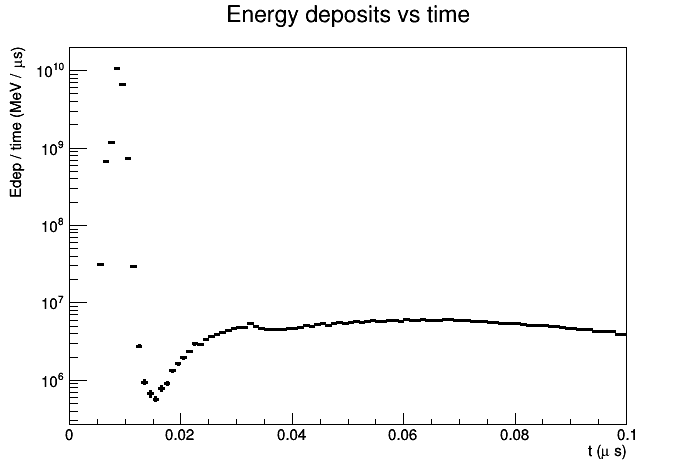

In [12]:


title = 'Energy deposits vs time;t (#mu s);Edep / time (MeV/#mus)'
canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    c,_ = DrawTotalDep(xRanges[n],title,rebin=10,hist_name='Detector_{0:}_edep'.format(time_array[n]),draw_tex=False,scale_by_binW=True)
    canvas.append(c);__.append(_)
    c.Draw()

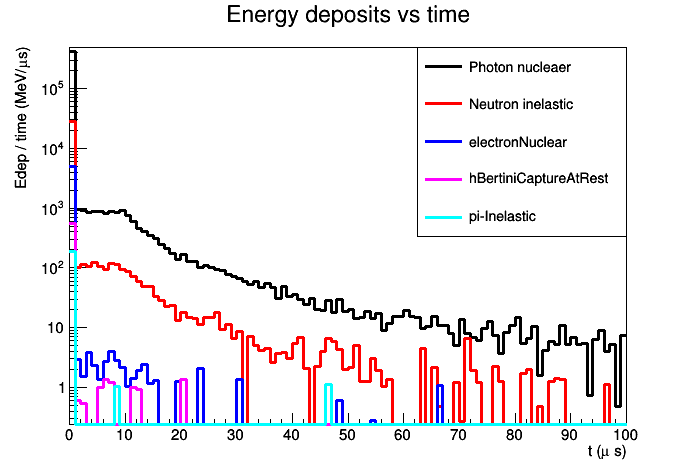

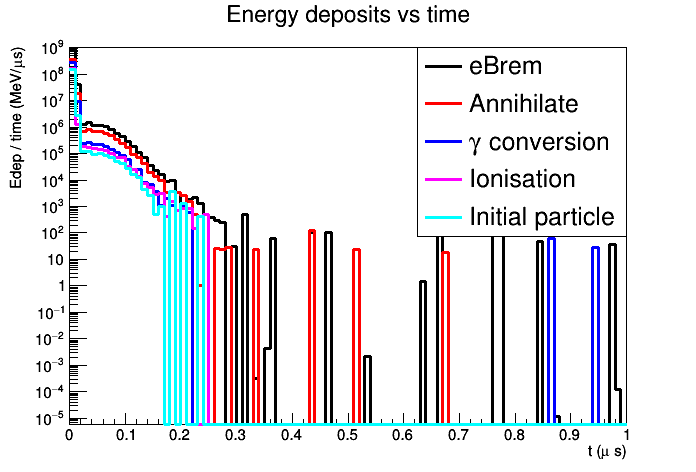

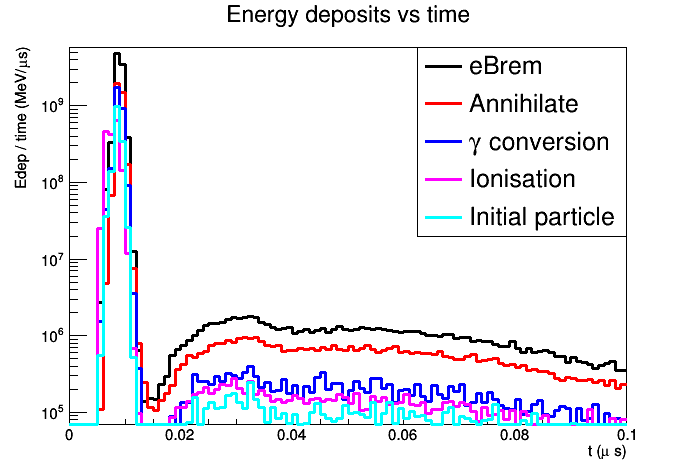

In [14]:
def wrapper(rangex):
    def cmp(hist):
        if rangex[1]<10:
            return hist.Integral()
        else:
            integral = hist.Integral(hist.GetXaxis().FindBin(20),hist.GetXaxis().FindBin(80))
            return integral
    return cmp

title = 'Energy deposits vs time;t (#mu s);Edep / time (MeV/#mus)'
canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    tmp_h = 'Detector_From_{{0:}}_{0:}_edep'.format(time_array[n])
    f = lambda x : [a[0] for a in x]
    keys = f(Sort_keys(processes,tmp_h,wrapper(xRanges[n])))[:5]
    c,_ = DrawEdep(tmp_h,xRanges[n],title,rebin=10,particles=keys,legPos=[0.6,0.5,0.9,0.9],scale_by_binW=True)
    c.SetLogy(1)
    canvas.append(c);__.append(_)
    c.Draw()

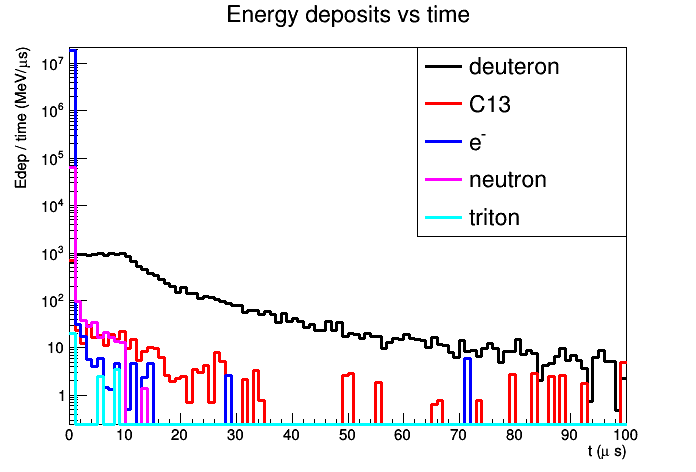

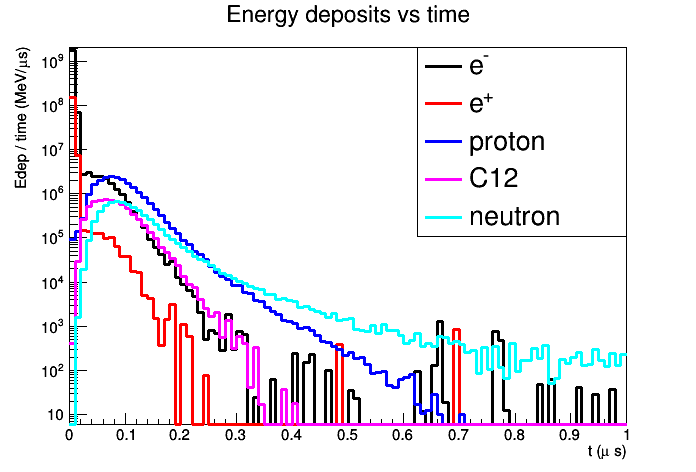

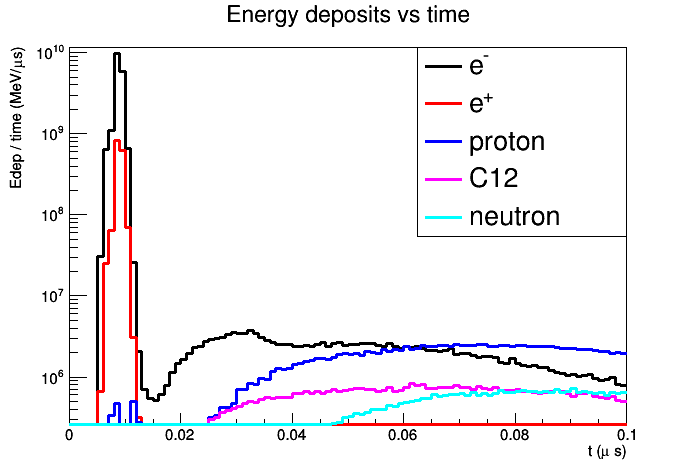

In [15]:
def wrapper(rangex):
    def cmp(hist):
        if rangex[1]<10:
            return hist.Integral()
        else:
            integral = hist.Integral(hist.GetXaxis().FindBin(20),hist.GetXaxis().FindBin(80))
            return integral
    return cmp

title = 'Energy deposits vs time;t (#mu s);Edep / time (MeV/#mus)'
canvas = []
__ = []
time_array = ['time','time_small','time_tiny']
xRanges = [[0,100],[0,1],[0,0.1]]
for n in range(3):
    tmp_h = 'Detector_{{0:}}_{0:}_edep'.format(time_array[n])
    f = lambda x : [a[0] for a in x]
    keys = f(Sort_keys(particles,tmp_h,wrapper(xRanges[n])))[:5]
    # keys = ['nCapture']
    c,_ = DrawEdep(tmp_h,xRanges[n],title,rebin=10,particles=keys,legPos=[0.6,0.5,0.9,0.9],scale_by_binW=True)
    c.SetLogy(1)
    canvas.append(c);__.append(_)
    c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


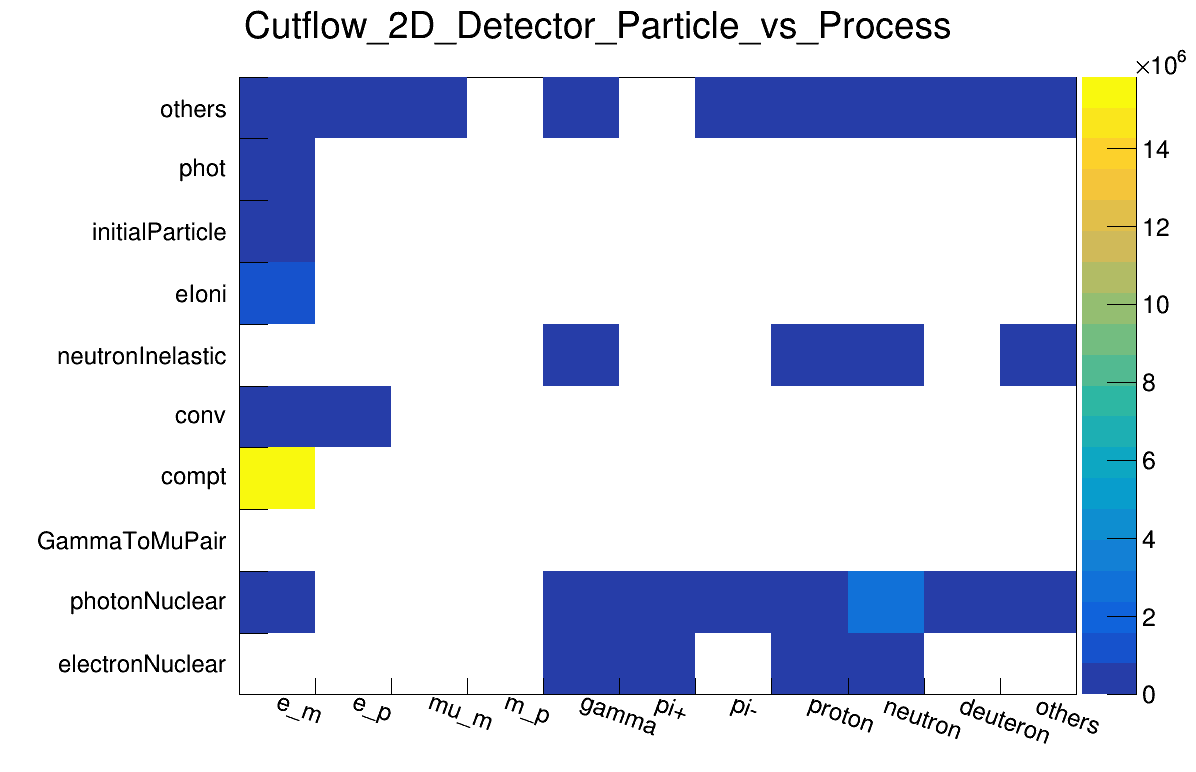

In [72]:
c = R.TCanvas('c1','c1',1200,800)
c.SetLeftMargin(0.2)
h = GetHist('Cutflow_2D_Detector_Particle_vs_Process')
h.SetStats(0)
h.SetLabelSize(0.05)
h.GetYaxis().SetLabelSize(0.05)
h.Draw('COLZ')
h.SetTitle

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


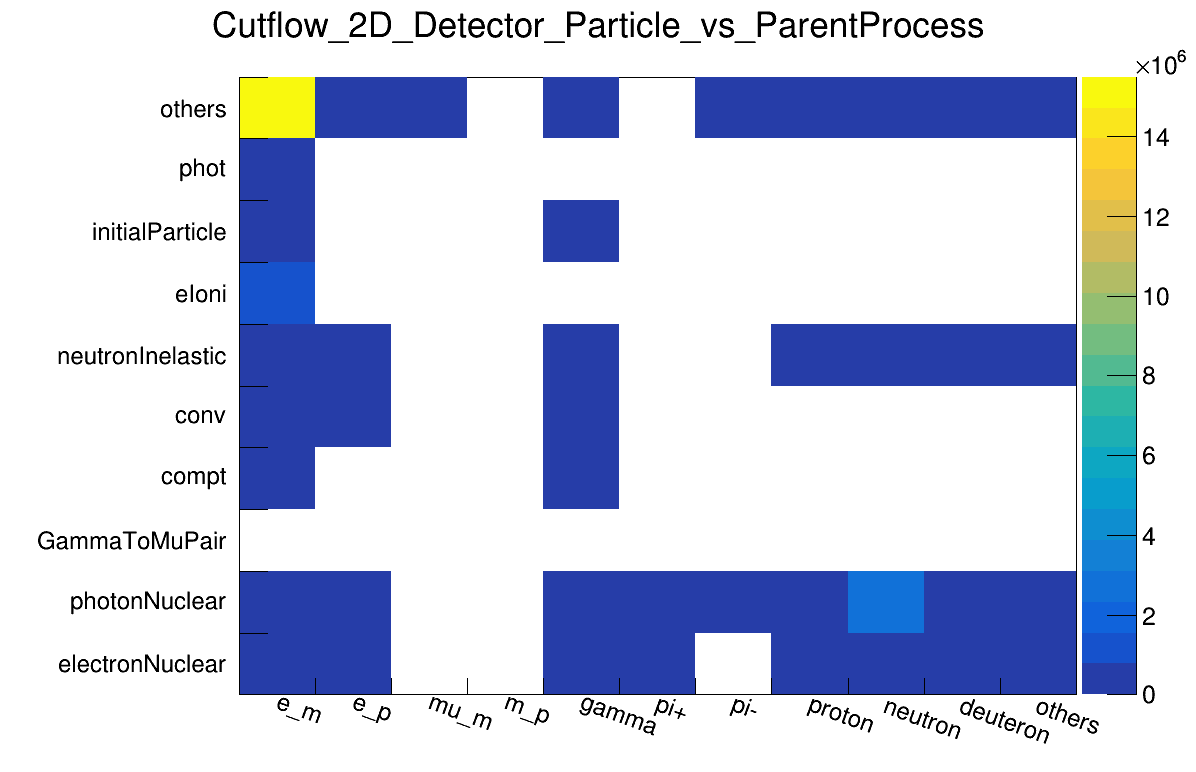

In [73]:
c = R.TCanvas('c1','c1',1200,800)
c.SetLeftMargin(0.2)
h = GetHist('Cutflow_2D_Detector_Particle_vs_ParentProcess')
h.SetStats(0)
h.SetLabelSize(0.05)
h.GetYaxis().SetLabelSize(0.05)
h.Draw('COLZ')
h.SetTitle

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


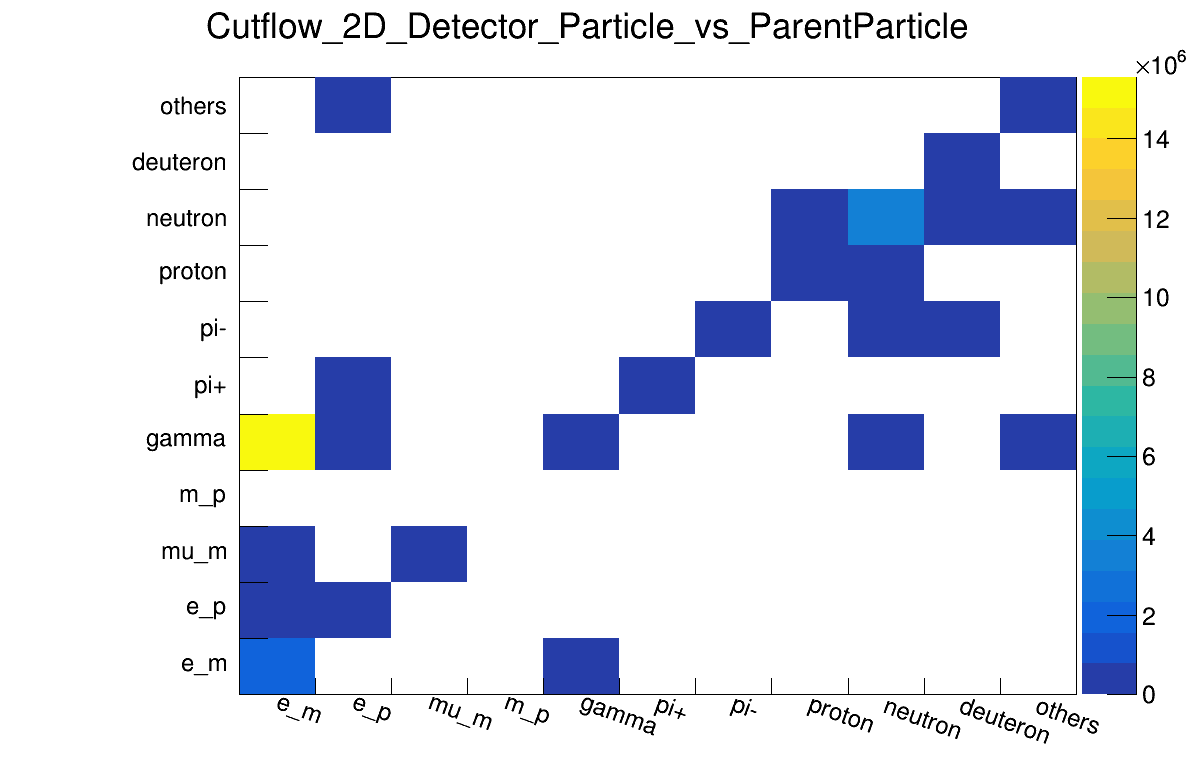

In [74]:
c = R.TCanvas('c1','c1',1200,800)
c.SetLeftMargin(0.2)
h = GetHist('Cutflow_2D_Detector_Particle_vs_ParentParticle')
h.SetStats(0)
h.SetLabelSize(0.05)
h.GetYaxis().SetLabelSize(0.05)
h.Draw('COLZ')
h.SetTitle

c.Draw()